# HMC712ALP3CE Attenuation Analysis

 - Datasheet: https://www.analog.com/media/en/technical-documentation/data-sheets/hmc712A.pdf
 - Settling Time Measurements: https://nio365-my.sharepoint.com/:p:/g/personal/charles_herridge_ni_com1/ET8JMmes_pxJo4cvY6xoPLkBhRY2I3E2c_gFqlBh45T_IA
 

### VVA2 Configuration
The "0 dB" VVA state will be some max value of gain
VVA will always be increasing in attenuation



In [ ]:
%matplotlib inline

import skrf
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
ns = skrf.NetworkSet.from_zip('HMC712A_sparameters_deembedded.zip').filter('Vctrl2=-5V')

In [ ]:
vctrl1 = [float(ntwk.name.split('Vctlr1=')[1][:-1]) for ntwk in ns]
frequency = ns[0].frequency.f_scaled
portnumbers = range(1,ns[0].nports+1)

In [ ]:
coords={'Frequency': frequency,
        'Vctrl1': vctrl1,
        'n': portnumbers,
        'm': portnumbers }

s = xr.DataArray(data = np.stack([*ns.to_s_dict().values()]),
                         dims=('Vctrl1','Frequency','n','m'),
                         coords=coords)

# add units
s.Frequency.attrs = {'units': 'GHz'}
s.Vctrl1.attrs = {'units': 'V'}

# select 5.5-27 GHz
s = s.sel(Frequency=slice(5.5,27))

mag_s = 20*np.log10(np.abs(s))

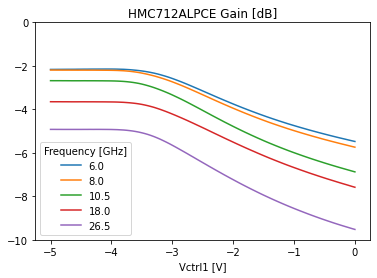

In [ ]:
mag_s.sel(n=2,m=1,Frequency=[6,8,10.5,18,26.5],method='nearest').plot.line(x='Vctrl1',ylim=(-10,0))
plt.title('HMC712ALPCE Gain [dB]');

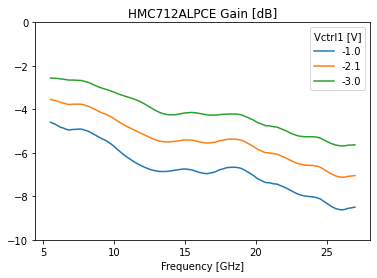

In [ ]:
mag_s.sel(n=2,m=1,Vctrl1=[-1,-2.1,-3]).plot.line(x='Frequency',ylim=(-10,0))
plt.title('HMC712ALPCE Gain [dB]');